# Superdense Coding

In [21]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Let us first create the circuit that implements Superdense Coding.

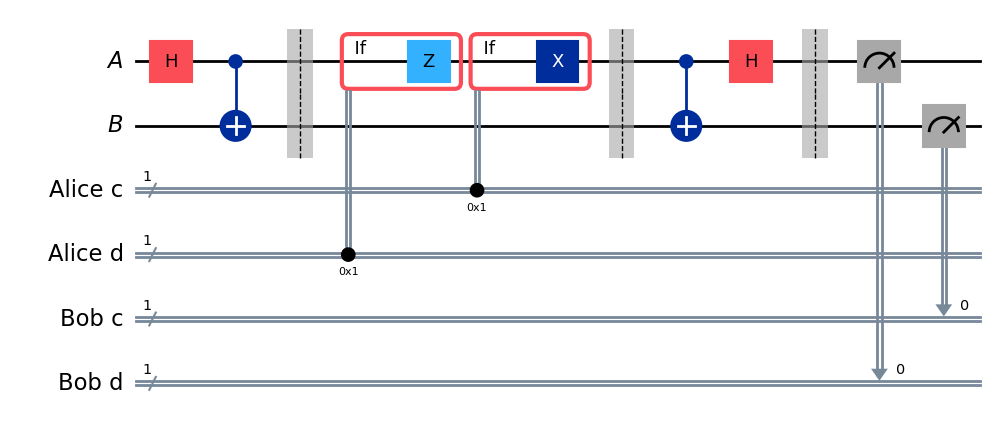

In [23]:
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

protocol = QuantumCircuit(ebit0, ebit1, Alice_c, Alice_d)

# Initialize the ebit
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with protocol.if_test((Alice_d, 1), label="Z"):
    protocol.z(ebit0)
with protocol.if_test((Alice_c, 1), label="X"):
    protocol.x(ebit0)
protocol.barrier()

# Bob's actions
protocol.cx(ebit0, ebit1)
protocol.h(ebit0)
protocol.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
protocol.add_register(Bob_c)
protocol.add_register(Bob_d)
protocol.measure(ebit0, Bob_d)
protocol.measure(ebit1, Bob_c)

display(protocol.draw(output="mpl"))

In order to generate 2 random classical bits for testing the above circuit, we will introduce another quantum register "coin". We apply Hadamard to coin to convert it from $|0\rangle$ state to $|\phi^+\rangle$ state. Then we will measure, which will give us either 0 or 1 with equal probability.
Then we will send these classical bits into the Superdense coding circuit created above.

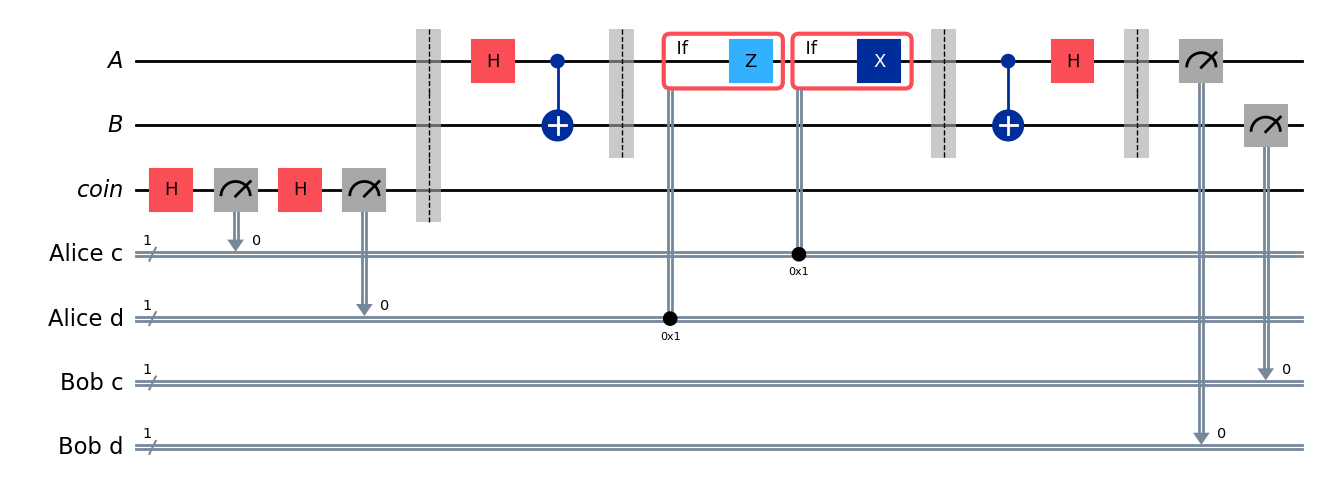

In [26]:
rbg = QuantumRegister(1, "coin")

test = QuantumCircuit(ebit0, ebit1, Alice_c, Alice_d, Bob_c, Bob_d, rbg)

# Use the 'coin' qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

#Append the protocol after the random bits generator
test = test.compose(protocol)
display(test.draw(output="mpl"))

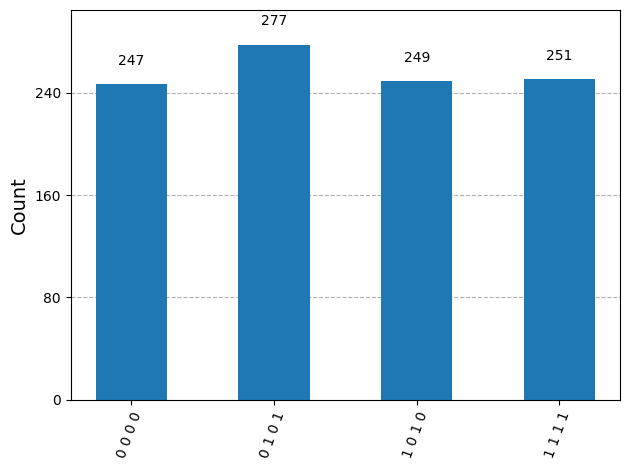

In [27]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

We test our circuit multiple times, and in all cases, we find that Bob's c and d bits match with Alice's c and d bits. Hence the circuit is working properly!